In [101]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [102]:
##### Data Loading

airline = pd.read_csv('international-airline-passengers.csv',parse_dates=True)
print(airline.shape)

(145, 2)


In [103]:
airline.columns = ['Month', 'Passengers']

In [104]:
airline.head()

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [105]:
airline.drop(144, axis=0, inplace=True)

In [106]:
airline['Month'] = pd.to_datetime(airline['Month'])

In [107]:
airline.index = airline['Month']

In [108]:
airline.drop(['Month'], axis=1, inplace=True)

In [109]:
airline

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


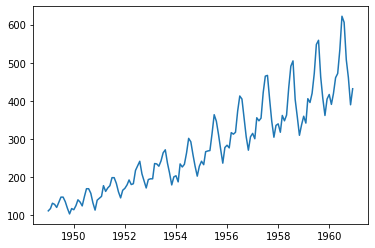

In [110]:
plt.plot(airline['Passengers'])
plt.show()

<ipython-input-111-b247e32bba7e>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_result = seasonal_decompose(airline['Passengers'], freq=12)


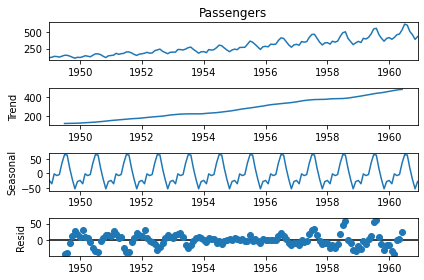

In [111]:
decompose_result = seasonal_decompose(airline['Passengers'], freq=12)
decompose_result.plot()
plt.show()

In [112]:
m = 12
alpha = 1/(2*m)

In [113]:
ses_model = SimpleExpSmoothing(airline['Passengers'])

res_ses = ses_model.fit(smoothing_level = alpha, optimized=False, use_brute=True)

#airline[[‘Thousands of Passengers’,’HWES1']].plot(title=’Holt Winters Single Exponential Smoothing’);

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [114]:
res_ses.params

{'smoothing_level': 0.041666666666666664,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [115]:
predictions_ses = res_ses.fittedvalues

In [116]:
airline['ses_forecast'] = predictions_ses

In [117]:
airline

,Passengers,ses_forecast
Month,,
1949-01-01,112.0,112.000000
1949-02-01,118.0,112.000000
1949-03-01,132.0,112.250000
1949-04-01,129.0,113.072917
1949-05-01,121.0,113.736545
...,...,...
1960-08-01,606.0,403.131765
1960-09-01,508.0,411.584608
1960-10-01,461.0,415.601916


In [118]:
res_ses.forecast(10)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1961-01-01    417.000109
1961-02-01    417.000109
1961-03-01    417.000109
1961-04-01    417.000109
1961-05-01    417.000109
1961-06-01    417.000109
1961-07-01    417.000109
1961-08-01    417.000109
1961-09-01    417.000109
1961-10-01    417.000109
Freq: MS, dtype: float64

In [122]:
###### Holtz Winter method

es_model = ExponentialSmoothing(airline['Passengers'], trend='additive', seasonal='mul', seasonal_periods=12)

res_es = es_model.fit(optimized=True, use_brute=True)

predictions_es = res_es.fittedvalues

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [123]:
airline['es_forecast'] = predictions_es

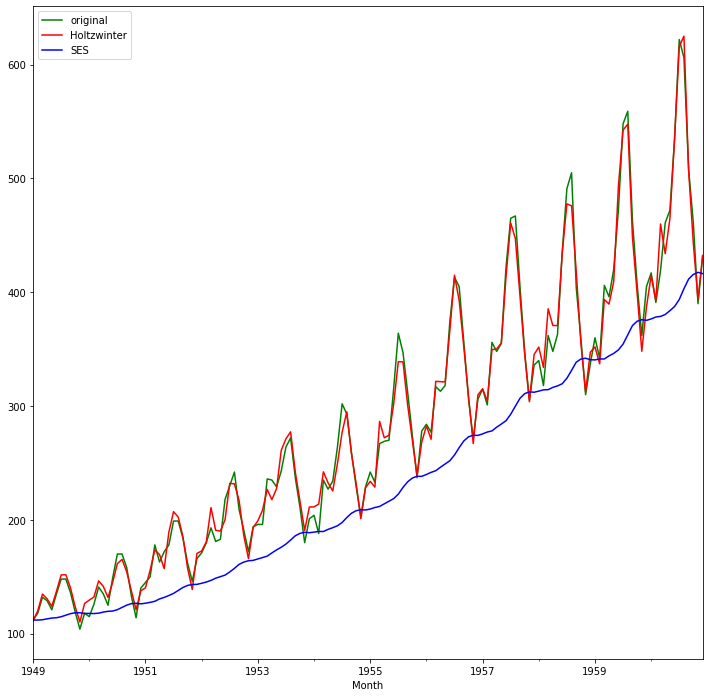

In [124]:
plt.figure(figsize=(12,12))
airline['Passengers'].plot(label='original', color='green')
airline['es_forecast'].plot(label='Holtzwinter', color='red')
airline['ses_forecast'].plot(label='SES', color='blue')
#plt.plot(airline[['Passengers', 'forecast', 'es_forecast']])
plt.legend()

In [134]:
from pandas.tseries.offsets import DateOffset
future_dates = [airline.index[-1] + DateOffset(months = x) for x in range(0,14)]

In [135]:
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00')]

In [136]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = airline.columns)

In [137]:
future_df = pd.concat([airline,future_dates_df])

In [138]:
future_df.tail(20)

,Passengers,ses_forecast,es_forecast
1960-06-01,535.0,387.468614,534.780274
1960-07-01,622.0,393.615755,615.632944
1960-08-01,606.0,403.131765,625.008805
1960-09-01,508.0,411.584608,506.744546
1960-10-01,461.0,415.601916,443.212972
1960-11-01,390.0,417.493503,393.493617
1960-12-01,432.0,416.347940,432.350962
1961-01-01,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN


In [146]:
future_df = pd.concat([airline, pd.DataFrame({'ses_forecast': res_ses.forecast(13),
                                  'es_forecast': res_es.forecast(13)})], axis=0)
#airline['es_forecast'] = res_es.forecast(13) 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [148]:
future_df.tail(20)

,Passengers,ses_forecast,es_forecast
1960-06-01,535.0,387.468614,534.780274
1960-07-01,622.0,393.615755,615.632944
1960-08-01,606.0,403.131765,625.008805
1960-09-01,508.0,411.584608,506.744546
1960-10-01,461.0,415.601916,443.212972
1960-11-01,390.0,417.493503,393.493617
1960-12-01,432.0,416.347940,432.350962
1961-01-01,NaN,417.000109,445.242238
1961-02-01,NaN,417.000109,418.225149
1961-03-01,NaN,417.000109,465.309453


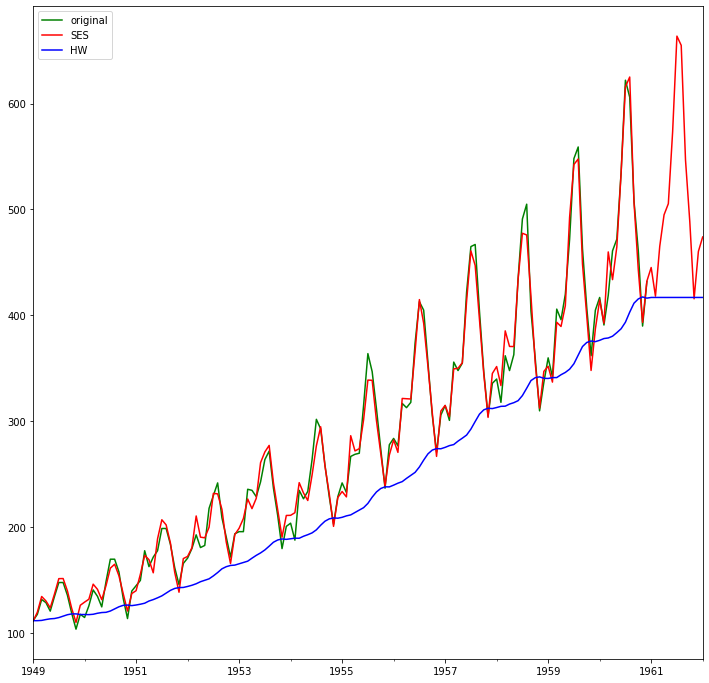

In [149]:
plt.figure(figsize=(12,12))
future_df['Passengers'].plot(label='original', color='green')
future_df['es_forecast'].plot(label='SES', color='red')
future_df['ses_forecast'].plot(label='HW', color='blue')
#plt.plot(airline[['Passengers', 'forecast', 'es_forecast']])
plt.legend()